### Practical Example - Car Sales

Import the relevant libraries:

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

Load the Raw Data:

In [10]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


What we want to do is predict the price of a used car depending on its specifications. 

The first potential regressor is 'Brand' as it is well known that a BMW is more expensive than a Toyota.

The second relevant variable is 'Mileage' since the more a car is driven, the cheaper it should be.

Third, is the 'EngineV' or Engine Volume - sports cars have larger engines than economy cars.

Final variable is 'Year' because the older a car is, the cheaper it should be.

The rest are categorical variables that we will deal with on a case-by-case basis.

### Preprocessing

Explore the descriptive statistics of the variables - the data is not cleaned this time:

In [19]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


This gives us descriptors for the categorical variables as well. 

The first thing we notice is that each variable has a different number of observations, which indicates there are some missing values. 

Next, we can see unique entries for categorical variables - there are 312 unique models. This is something that is really hard to implement in a regression because that would mean more than 300 dummy variables.

Another piece of information we have is the most common category (i.e. 'Top' row) and below it is it's frequency. 'Registration' for instance has 3,947 'Yes' entries (almost all of them), so it looks like this variable won't be very useful. 

As we mentioned, reliably implementing 'Model' into our regression would be a very hard task, so we will drop it. A lot of the information from 'Model' could be engineered from 'Brand', 'Year', and 'EngineV' so we won't be losing too much variability.

### Determining the variables of Interest

To remove the 'Model' variable, we will use the Pandas method DataFrame.drop(columns,axis) which returns a new object with the indicated columns dropped. Remember axis 1 is columns and axis 0 is rows.

In [28]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Now, we still haven't addressed the missing-values problem. Brand, body, mileage, registration, and year seem to have no missing values, given that the total number of observations is 4,345. However, we can't say the same for Price and EngineV.

### Dealing with Missing Values

In [34]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

We see that Price and EngineV are the only features with missing values, but only several of them. So we can just delete them.

Good rule of thumb - if you are removing <5% of the observations, you are free tojust remove all that have missing values.

In [37]:
data_no_mv = data.dropna(axis=0)

Remember you are dealing with rows with missing values, so axis is 0 because we want to drop the missing values in the row, not the columns.

In [40]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Notice the minimum and maximum values with respect to the mean and the quartiles for each variable.

### Exploring the Probability Distribution Functions (PDFs)

<Axes: xlabel='Price', ylabel='Count'>

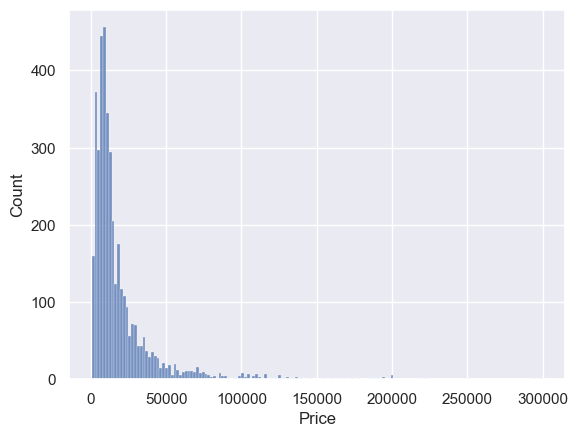

In [87]:
sns.histplot(data_no_mv['Price'])

#### Dealing with Outliers

For optimal results, we are looking for a normal distribution. 'Price', however, has an exponential one, which will surely be a problem for our regression. 

So, what about it's descritives? 
'Price' has a mean of 19552.30, the minimum price is 600, 25% of prices are under 7,000, 50% are lower than 11,500, and 75% are lowed then 21,900. Yet, the maximum price is 300,000, so obviously we have a few outliers in the price variable. 

Outliers will affect the regression dramatically and cause coefficients to be inflated, as the regression will try to place the line closer to those values. 

One way to deal with outliers, seamlessly, is to remove the top 1% of observations, which we can do using the DataFrame.quantile(the quantile) method, which returns the value at a given quantile. You can input values from 0 to 1. So, if you input 0.25 you'll get the 25th percentile. 

Here we want to get the 99th percentile and keep the data below it. 

In [52]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


Here, we devlared a new variable 'q', which takes all the data below the 99th percentile. This is actually a value around $130,000. 

Then, we created a new dataframe (data_1) to keep only those entries of price that are below the 99th percentile value. So now we have reusable code for this.

Now we have data with Price max value around $130,000, and although it is still far away from the mean, it is acceptably closer.

Note: In general, we don't print descriptives and data frames all the time. You do it once, and then just manipulate your data with code until you are done.

<Axes: xlabel='Price', ylabel='Count'>

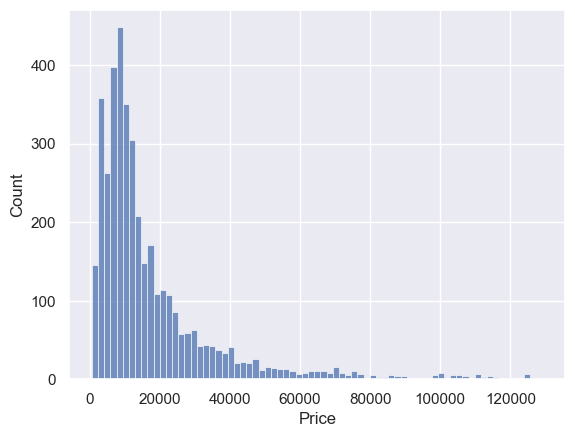

In [85]:
sns.histplot(data_1['Price'])

Now we see that the data is still distributed in the same way, but with less outliers. So this issue is out of the way.

However, we have a similar issue with mileage, engine volume, and year.

<Axes: xlabel='Mileage', ylabel='Count'>

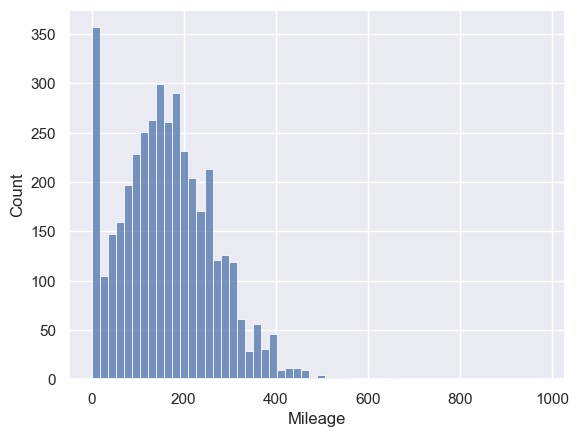

In [83]:
sns.histplot(data_no_mv['Mileage'])

We can see that the data is almost identical to the issue we had above, so we can deal with it in the same way.

In [62]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<Axes: xlabel='Mileage', ylabel='Count'>

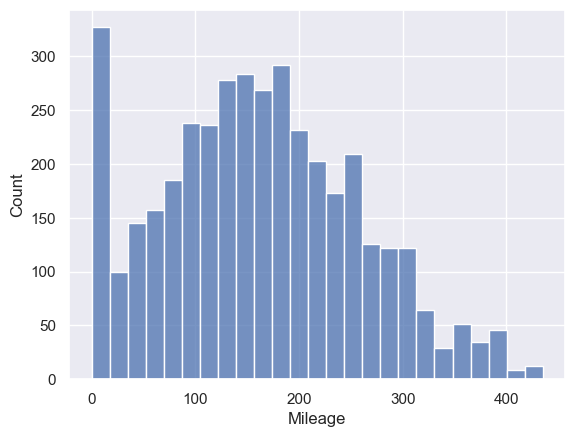

In [77]:
sns.histplot(data_2['Mileage'])

Now, what about engine volume?

<Axes: xlabel='EngineV', ylabel='Count'>

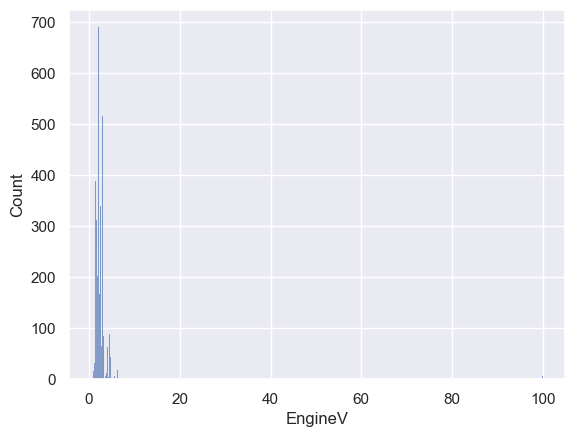

In [81]:
sns.histplot(data_no_mv['EngineV'])

This looks rather strange... If we were to examine engine volume manually (below) in the dataset, we would notice that there are also the engine volume values of 99.99, 90, 75, etc. which are not usual values for Engine Volume. 

Moreover, looking at the descriptives, it seems that most of the values are really low. A quick google search confirms that Engine Volume should fall between an interval of 0.6 and 6.5. Therefore, those 99.99s and so on are incorrect entries. 

In fact, a common way to label missing values is by assigning 99.99, which came from the early ages of computers. However, it is a bad idea to label values in such ways as it is hard for other users of the data to distinguish them from true values. But just be aware that this may happen in datasets.

In [90]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


So, now we have a benchmark, 6.5 for Engine Volume. So we can remove all the values that are lower than 6.5, as we know the natural domain of the engine volume values:

In [94]:
data_3 = data_2[data_2['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Count'>

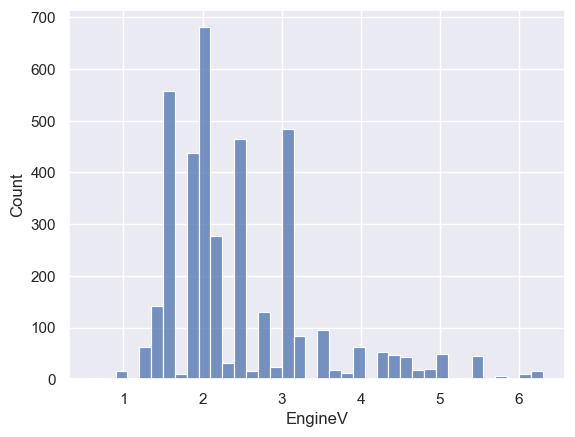

In [96]:
sns.histplot(data_3['EngineV'])

Now, what about year?

<Axes: xlabel='Year', ylabel='Count'>

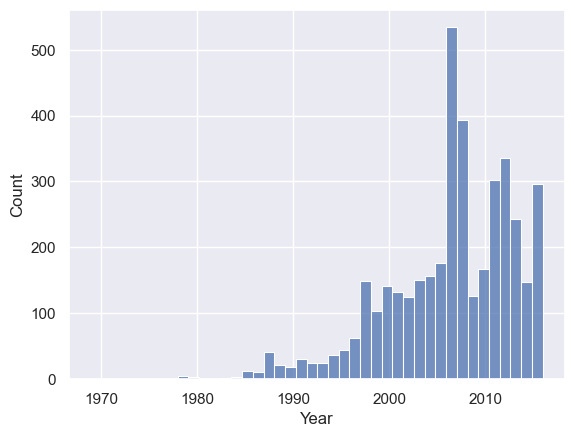

In [99]:
sns.histplot(data_no_mv['Year'])

The problem with year is it's on the low end - most cars are newer, but there seem to be a few vintage cars. 

This time, let's take the first percentile and keep all observations that are higher.

In [102]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/var/folders/jv/y5860x4d6zd5v1y_7951k44r0000gn/T/ipykernel_19719/2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

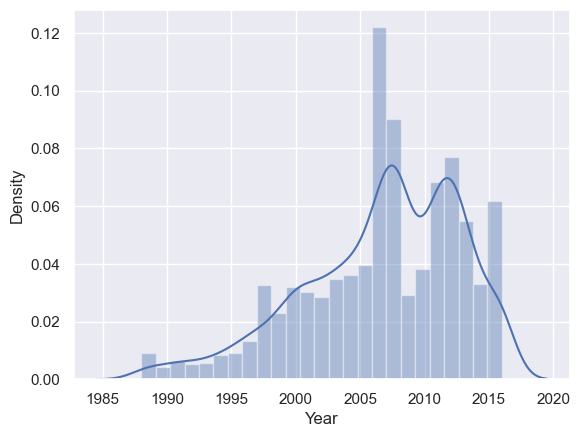

In [110]:
sns.distplot(data_4['Year'])

Now, we will create a data variable (data_cleaned) and reset the index. 

Currently, the indices of the data frame refer to all the data, but we want them to describe only the data useful for analysis. So we will use the method DataFrame.reset_index(drop=True). The drop=True argument completely forgets the old index.

In [114]:
data_cleaned = data_4.reset_index(drop=True)

In [116]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Now we see that the minimum and maximum values seem about right. We have deleted about 250 observations, but these were the problematic ones. 

### Checking the OLS Assumptions

Here we are going to explore and relax some of the OLS Assumptions. 

We have already identified some variables as potential regressors. The categorical ones will be included as dummies, so we don't need to worry about them when checking the assumptions. 

The continuous variables - 'Price', 'Year', 'EngineV', and 'Mileage' are those that are likely to be more challenging and cause us more problems. 

First, let's check for linearity using a scatter plot:

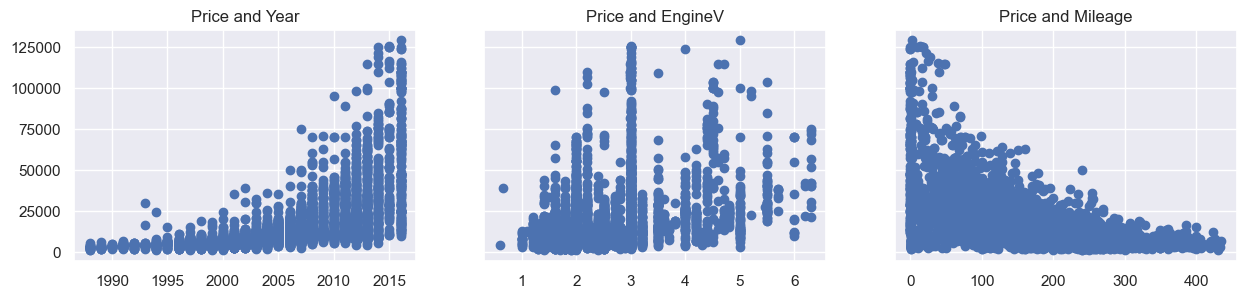

In [125]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

We can spot patterns in this data, comparing all of the independent variable to the dependent one (Price), but they are definitely not linear. 

So, we know we should not run a linear regression in this case. We first need to transform one or more variables. 

Recall the distribution plot of price too. All these plots are pointing us to the idea that price is not normally distributed, and from there, it's relationships with the other rather normally distributed features is not linear. 

The patterns are quite exponential.

/var/folders/jv/y5860x4d6zd5v1y_7951k44r0000gn/T/ipykernel_19719/462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

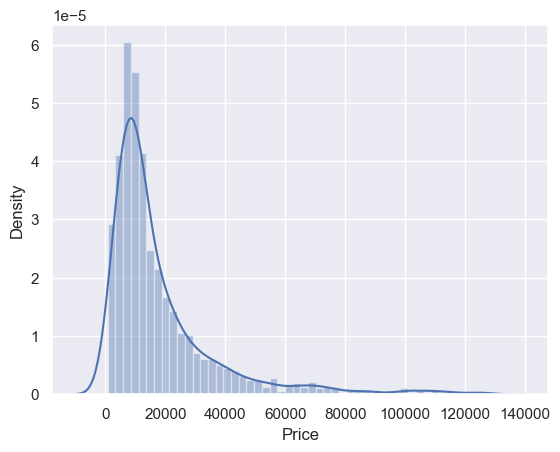

In [129]:
sns.distplot(data_cleaned['Price'])

#### Relaxing the assumptions

This is where log transformations come in to deal with this issue. It is especially useful when facing exponential scatter plots like we see now. 

So, let's take the log of 'Price' and create the plots again. Numpy has a method np.log(x) that returns the natural logarithm of a number or array of numbers. We will declare a variable (log_price) to take the log of 'Price' and then we will add it as a new column at the end of our dataframe.

In [135]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Now, plot them again:

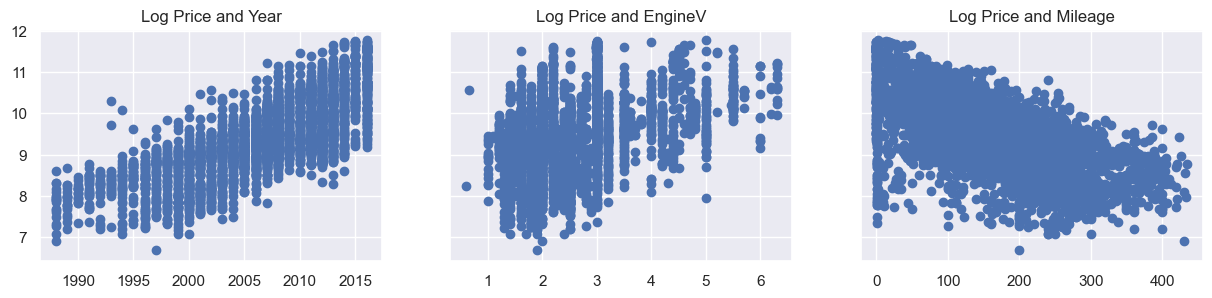

In [139]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

We can now see a linear pattern in all plots. The lines fit the data so much better. 

At this point, let's drop the original price variable from the data frame, since it is no longer needed:

In [142]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### Muticollinearity

Next, we usually deal with the no endogeneity assumption. There are tests to check if it is violated or one can take the residuals and find their correlation with each independent X. 

However, for this example, it is confirmed that this assumption is NOT violated, so we don't need to worry about it for this problem. We will have the opportunity to discuss the residuals after the regression is created. 

The third assumption - Normality and Homoscedasticity - has several parts:

1.) Normality is assumed for a big sample following the central limit theorem (CLT)

2.) The zero mean of the distribution of errors is accomplished through the inclusion of the intercept in the regression, which we discussed already. 

3.) The homoscedasticity assumption generally holds, as we can see in the graphs because we already implemented a log transformation, which is the most common fix for datasets with heteroscedasticity(bad).

The Fourth Assumption - No Autocorrelation (aka no serial correlation) - we don't really need to put much effort into relaxing this one because the observations we have are not coming from time series data or panel data. 

The data is simple a snapshot of the current situation at a secondhand car sales website. Each row comes from a different customer who is willing to sell their care through the platform. 

So, logically, there is no reason for the observations to be dependent on each other (i.e. there is not autocorrelation). So we are safe.

Finally, we should check for Multicollinearity:

In [150]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

It is logical that 'Year' and 'Mileage' are going to be correlated(i.e. the newer the car the lower it's mileage). So, we can expect to have some degree of multicollinearity in the data. 

Unfortunately, sklearn does not have a dedicated method to check this assumption. So, we must use StatsModels.

One of the best ways to check for multicollinearity is through the Variance Inflation Factor (VIF) - which produces a measure that estimates how much larger the square root of the standard error of an estimate is, compared to a situation where the variable was completely uncorrelated with the other predictors. 

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

Code Explanation:

First, we import the VIF method from StatsModels. 

Next, we define the features we want to check for multicollinearity (i.e. Mileage, Year, and EngineV). We only have these three continuous variables, the rest are categorical variables that we haven't dealt with yet. So, we will simply take these three variables and evaluate their intercorrelation.

The rest is syntax.

Note: Review the supplemental resource provided after this lecture on multicollinearity.

In [155]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Breakdown of the Variance Inflation Factors Results:

VIF = 1: No Multicollinearity at all. This is also the minimum value of this measure. 

1<VIF<5: Perfectly Okay 

5<FIV OR 6<FIV OR 10<VIF: Unacceptable - some say a VIF above 5 is unacceptable, some say above 6 is unacceptable, and some even say anything above 10 is unacceptable. 

There is no concensus on the topic, but from experience we rarely find data so perfect that all features have a VIF below 5, so this is considered conservative.

For this example, it seems like 'Year' is definitely too correlated with the other variables. Therefore, we will only remove 'Year':

In [162]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

### Create Dummy Variables

We already know how categorical data is added to a regression through dummy variables, but if we need to add multiple dummy variables simultaneously we should use the pd.get_dummies(df[,drop_first]) method in pandas, which spots all categorical variables and creates dummies automatically. 

Important Note: If we have N categories for a feature, we have to create N-1 dummies. If we include a separate dummy variable for each category, we will introduce multicollinearity to the regression because that separate dummy variable would be perfectly determined by the other variables. (i.e. If all other car brands/dummy variables are 0s and Audi, for example is 1, then it's clear that the car is an Audi). Thus, if we have N categories, we have to create N-1 dummies.

In [166]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

We create a new variable (data_with_dummies) and add the argument drop_first=True to make sure no dummy is created for Audi. 

In [169]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


Now we have not only brand, but also the other categorical features, namely body, engine type, and registration, have been replaced with their dummies. 

This is very convenient, as we only need one line of code to process all categorical features. 

HOMEWORK: 

1.) Check the VIF of the features including the dummies. 

2.) You can also try finding the VIF of a set of features where you haven't dropped one of the dummies. You'll be amazed by the results.

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies[['Mileage', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [179]:
vif

,VIF,features
0,2.805214,Mileage
1,2.805214,EngineV


#### Rearrange a Bit

To faciliate our work, we will reorder the columns so that the dependent variable (log_price) is the first one in the data frame. 

We can check the columns we have with:

In [183]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [185]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

We just simply copy the table output and cut and paste the columns where we want them. 

Then, store this in a new dataframe (data_preprocessed):

In [188]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Linear Regression Model

#### Declare the Inputs and Targets

In [192]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

The inputs are simply the data_preprocessed without log price, so we just drop log price from the inputs variable.

#### Scale the Data

In [196]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

We create a variable 'scaler' which will be an instance of the standard scaler class. 

Then, we must fit the inputs using scaler.fit(inputs)

We use the transform method to get the standardized inputs:

In [201]:
inputs_scaled = scaler.transform(inputs)

We have now standardized all the input variables.

Note: It is not usually recommended to standardize dummy variables, and some practitioners would argue strongly against it. 

For ML purposes, however, we don't really put too much thought into it and just go with the scale dummies. This is because scaling has no effect on the predictive power of dummies. Once scaled, though, they lose all their dummy meaning. 

Later on in the logistic regression section, we will learn how to implement a custom scaler, which standardizes only the continuous variables, while leaving the dummies unchanged.

#### Train Test Split

In [206]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

The first argument refers to the Xs (inputs_scaled) and the second argument refers to the Ys (targets).

#### Create the Regression

We have created 4 new variables - the ones with the suffix 'train' will be used to train the model and those with the suffix 'test' will be used to test the model. 

In [211]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

This is enough to create a linear regression model. In fact, it is not simply a linear regression, but a log linear regression, because our dependent variable is the logarithm of 'Price'.

A simple way to check the final result is to plot the predicted values agains the observed values(targets). 

We can obtain the predicted values using:

In [215]:
y_hat = reg.predict(x_train)

Remember - the predictions of the linear model are labeled with yhat, so it only makes sense to name the variable like this.

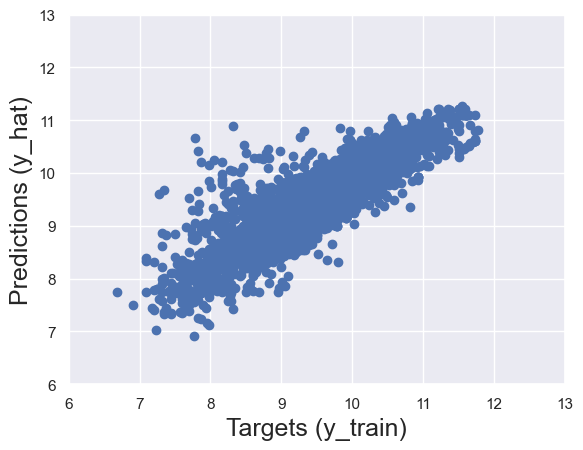

In [218]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

We used plt.xlim and plt.ylim to limit the axes so they are comprable.

In the best case scenario, if a target is 7, we want the prediction to be 7. If the target it 10, we want the prediction to also be 10, and so on. Ultimately, we can draw a 45 degree line, which shows the best possible match between targets and predictions. The closer our scatter plot is to this line, the better the model is.

So, we can see our result isn't perfect, but it is definitely not random. We can clearly see that the points are situated around the 45 degree line, so our model has passed this first check.

Another popular check on a model is the residual plot, which takes the differences between the targets and the predictions. So, a residual plot referrs to the distribution of the residuals.

So, we can simply use the SNS dist plot and plot the difference between y_train and y_hat:

/var/folders/jv/y5860x4d6zd5v1y_7951k44r0000gn/T/ipykernel_19719/329104437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

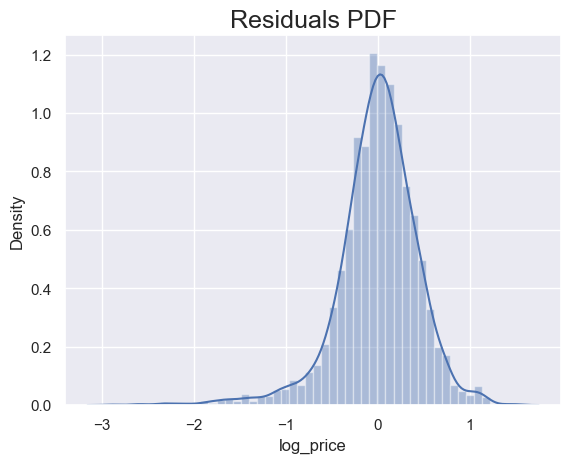

In [223]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

From the regression assumptions, we know that the errors must be normally distributed, with a mean of 0. 

The residuals are the estimates of the errors, so we would expect the same from them. 

The result looks quite normal, in the sense of normally distributed. The mean seems to be 0 too. The only possible issue could be that there is a much longer tail on the negative side. Therefore, there are certain observations for which (y_train - y_hat) is much lower than the mean (a much higher price is predicted than is observed). This implied that those predictions tend to overestimate the targets.

From the fact that there are no such observations on the right side, we conclude that the predictions rarely underestimate the targets. 

This is food for thought, and can serve as a guidance for how to better our model.

Finally, let's calculate the R-Squared:

In [227]:
reg.score(x_train, y_train)

0.744996578792662

This shows that our model is explaining about 75% of the variability of the data. 

This is a relatively good result, but it could definitely be better. Do this for homework.

#### Finding the Weights and Bias

In [231]:
reg.intercept_

9.415239458021299

In [233]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

The bias was contained in reg.intercept_ and the weights in reg.coef_

Since the weights are hard to read in this way, we will create a summary table with the feature names and corresponding weights:

In [236]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


This model is far from interpretable as it is - the dependent variable is a logarithm and all features are standardized, including the dummies, but we will work with what we have for now. 

First, some weights are positive, while other negative. 

Positive weight - shows that as a feature increases in value, so do the log_price and 'Price' respectively. (i.e. Engine Volume - the bigger the engine volume, the higher the price).

Negative weight - alternatively shows that as a feature increases in value, log_price and 'Price' decrease. (i.e. Mileage - the more a car is being driven, the lower the price gets).

The situation for dummies is a bit different - since we dropped one category for each discrete variable, when all included dummies are 0, then the drop dummy is 1. 

Take brand, for instance, we'll quickly display all categories that used to exist:

In [239]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

We see there were seven brands, but by looking at the 'Weights' table we realize that Audi was the dropped one. Therefore, whenever all other dummies are 0, Audi is 1. So Audi is the benchmark. 

A positive dummy variable weight - shows that the respective category (Brand) is more expensive than the benchmark (Audi)(i.e. We see BMW's coefficient is positive, so on average, if a car is a BMW, it will be more expensive than an Audi).

A negative dummy variable weight - shows that the respective category (Brand) is less expensive than the benchmark(Audi)(i.e. We see Mitsubishi's coefficient is negative, so on average, if a car is a Mitsubishi, it will be less expensive than an Audi).

You'll notice that the Mercedes weight is positive, but very close to 0. Since the dummies are scaled, we cannot be completely sure if a Mercedes is more expensive, but it seems to be as expensive as an Audi. 

We can think about the other dummies in a similar way - we display the possible categories and identify which one is the benchmark. (Homework) 

Finally, the size of the weight is also important - the bigger the weight, the bigger the impact. (i.e. Mileage is the most prominent feature in this regression, it is more than twice as important as enginer volume). 

Note: It doesn't make sense to compare the continuous variables with the dummies. Dummies are only compared to their respective benchmark dummies for the respective discrete variable, like we compared the brands with Audi.

#### Additional Exploration:

What are the reference(benchmark) categories for each categorical variable?

In [248]:
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [245]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

'Audi' is the benchmark for 'Brand' category, as it is the only one not showing in the reg_summary, meaning it is the variable that the 'Brand' is compared to. 

In [250]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

'Crossover' is the benchmark for 'Body' category.

In [253]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

'Diesel' is the benchmark for 'Engine Type' category.

In [256]:
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

'No' is the benchmark for 'Registration' category.

### Testing

Now, let's test how our model performed.

We start the testing part by finding the predictions, storing them in y_hat_test variable:

In [261]:
y_hat_test = reg.predict(x_test)

Next, lets plot the test targets against the predicted targets and see if they resemble the 45 degree line:

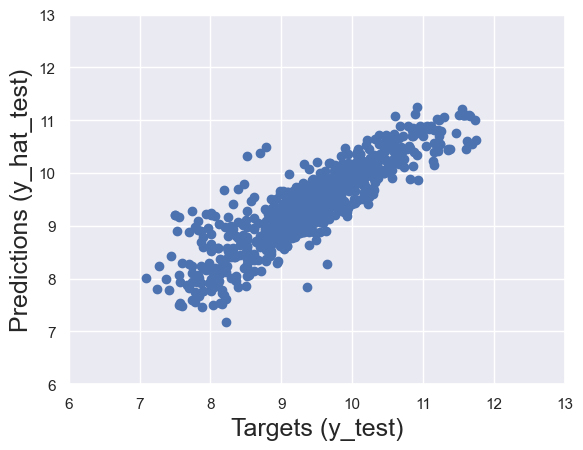

In [264]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

It looks quite decent, but there is more to this plot than we see at first glance:

For highere prices, we have a higher concentration of values around the 45 degree line. Therefore, our model is very good at predicting higher prices. 

However, for lower prices, the situation is not so great. They are much more scattered, meaning that we are not quite getting the prices right. We can include an additional argument to the scatter plot called plt.scatter(x,y,[alpha]), where alpha shows the proportional opacity of the points. Alpha takes values from 0 to 1, with 1 being the default. Here we will set it to O.2, but can mess around with this later on.

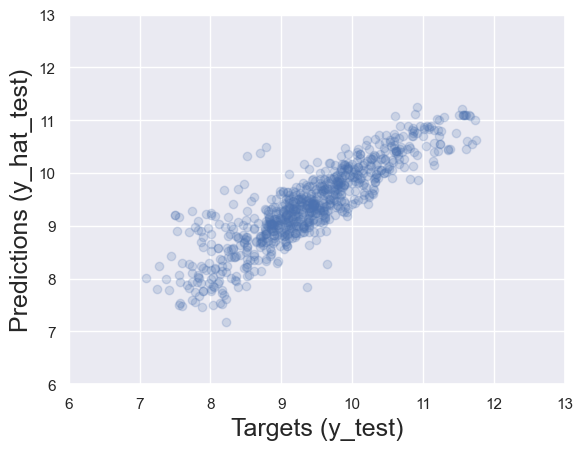

In [267]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

This turns our graph into a heat map of sorts - the more saturated the color, the higher the concentration of points. Thus, we have a much clearer indication, showing most of the points are indeed very close to the 45 degree line. 

Now, we can start to evaluated how good the actual predictions are. Although, it's unconventional, we can manually explore what the algorithm came up with to give more food for thought of what we have accomplished.

We will create a new dataframe called df_pf (dataframe performance), the data in it will consist of the predictions:

In [272]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


Unfortunately, these are the predctions for the log prices and normally, we'd prefer the actual prices not their logarithms. 

Since the log is the opposite of the exponential, if we take the exponentials of the log prices - exp(ln(x)) = |x|, we will reach the original prices. An easy way to do this is the np.exp(x) method, which returns the exponential of x(the Eurler number 'e' to the power of x):

In [275]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


We now have the predictions expressed as prices. 

After this, we can place the targets (y_test) next to them in the same dataframe, so we can easily compare them:

In [279]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


Unfortunately, we have a lot of missing values and they are quite randomly spread throughout the dataset. 

To try to understand issues like this one we can display the y_test dataframe:

In [282]:
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
          ...    
1935    10.292146
3757     9.169518
3134     9.814656
1369    11.134589
2595     9.287301
Name: log_price, Length: 774, dtype: float64

What we notice is that it contains indexes (first column). In fact, when we split the data into train and test the original indices were preserved. So, when we added y_test to df_pf, pandas tried to match the indices. 

What we need is to forget this origninal indexing. The easiest way to achieve that is to overwrite y_test with:

In [285]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

This operation will reset the index of y_test. 

Now, let's overwrite the exponential of y_test in df_pf target:

In [288]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


We get the results we initiallly tried to achieve. 

So, we have the predictions and the target. Now, we can proceed to comparing them - can be done manually or through code:

We will create another column in the dataframe called 'Residual', which will be equal to the difference between the targets and the predictions:

In [295]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

Can call the column 'Difference' as well if you want, but this is precisely the residual of the Predictions and Target.

This whole dataframe makes a lot of sense when evaluating the regression because the OLS framework is based on minimizing Standard Squares Error (SSE), which is achieved through minimizing the sum of squared residuals. Therefore, examining the residuals is the same as examining the heart of the optimization algorithm. 

In conclusion, we will also add difference in percentages to make it extra easy to evaluate the outputs and the targets:

In [299]:
df_pf['Differences %'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Differences %
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


We use the np.absolute method because knowing whether something is off by 1% or -1% is mostly irrelevant. 

Now, we have all that we need.

To evaluate the agregate performance, we could print the descriptive statistics of the dataframe:

In [303]:
df_pf.describe()

,Predictions,Target,Residual,Differences %
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


#### Highlights

The Minimum difference in percentages is 0.062%, so the output was spot on. 

The Maximum difference in percentages is 512.69%, which is pretty far off mark. 

Apart from the mins and maxs, there are the percentiles. All of these tell us that for most of our preditions, we got relatively close. 

At this point, we should manually revist the dataframe. So, let's sort df_pf by difference in percentages using the sort_values method:

In [310]:
df_pf.sort_values(by=['Differences %'])

,Predictions,Target,Residual,Differences %
698,30480.847838,30500.0,19.152162,0.062794
742,16960.310476,16999.0,38.689524,0.227599
60,12469.207487,12500.0,30.792513,0.246340
110,25614.137960,25500.0,-114.137960,0.447600
367,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.0,-26481.045510,441.350758
162,9954.416247,1800.0,-8154.416247,453.023125
451,35956.498331,6500.0,-29456.498331,453.176897
532,10019.903027,1800.0,-8219.903027,456.661279


By default, Pandas doesn't show us the whole dataset. 

If we'd like to see all rows, we can set the pd.options.display.max_rows to 999.

Additionally, if we want to make the dataset more readable, we can change the display options for floats to two digits after the dot, using the below expression:

In [317]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Differences %'])

,Predictions,Target,Residual,Differences %
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


Revising this datafram manually, we can see for which types of observations we've got good predictions, and which ones are very far off. 

It is particularly interesting to explore the ones that have the biggest differences. 

At the bottom of the dataframe, we see that there are very few predictions dramatically far off from the observed values. If you look closely at the observed column, you'd notice that the observed prices are extremely low, 3000, 4500, 2600, 1700.

As we know, our model is using the mileage, engine volume, brand, registration, and body type to predict the price of a used car. On average, it is pretty decent at predicting the price, but for these last samples it is NOT. 

Note: All residuals for these outliers are negative, meaning their predictions are higher than the targets. So, an explanation may be that we are missing an important factor, which drives the price of a used car lower. It may be the model of the car which we removed at the beginning of the analysis, but it could also be that the car was damaged in some way(i.e. a piece of information we did not initially have). 

#### How to improve our model

1.) We could use a different set of variables

2.) Remove a bigger part of the outliers

3.) Use different kinds of transformations

The model we've just created is not outstanding. The creation of a truly great model for a certain problem may consume months or even years. 

Machine Learning requires us to revisit the model many times before we are truly happy with the result. That said, feel free to dive into improving this model on your own!